In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline 

In [96]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-04-26 13:10:59--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2020-04-26 13:10:59 (1.72 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [97]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [98]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


In [99]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


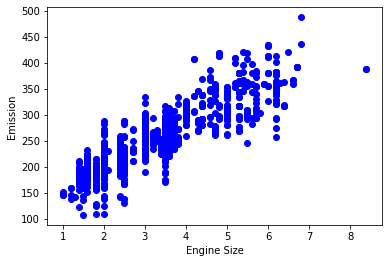

In [100]:
#plot Emission values with respect to Engine size:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [101]:
cdf = df[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [102]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

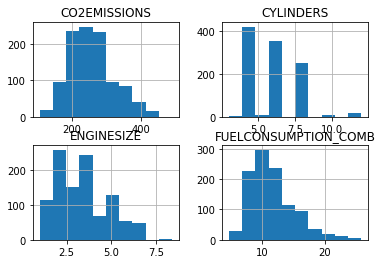

In [103]:
visual = cdf[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
visual.hist()
plt.show()

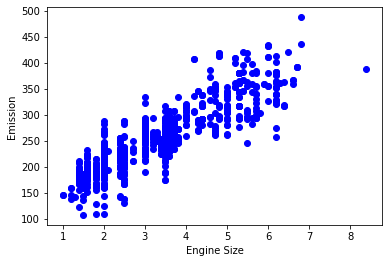

In [104]:
#Train data distribution¶
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

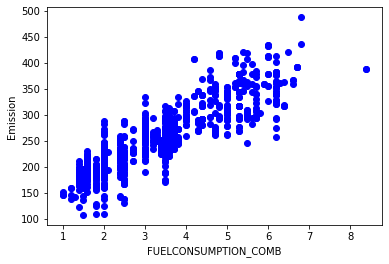

In [105]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel('Emission')
plt.show()

In [106]:
#train and test set
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Simple Regression Model: Linear Regression fits a linear model with coefficients 𝜃=(𝜃1,...,𝜃𝑛) to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation.



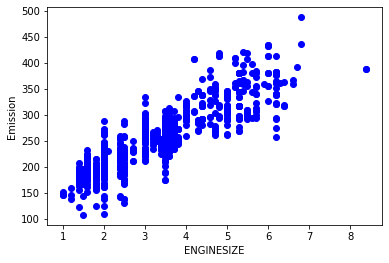

In [107]:
#Simple Linear Regression model 
#Train data distribution 
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel("ENGINESIZE")
plt.ylabel('Emission')
plt.show()

Simple Linear Regression: Modeling Using sklearn package to model data

In [108]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

#the coefficients 
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[39.27065684]]
Intercept:  [125.76781104]


Text(0, 0.5, 'Emission')

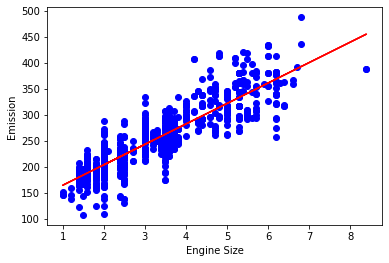

In [109]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")

Evaluation: compare the actual values and predicted values to calculate the accuracy of a regression model



In [110]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) **2))
print("R2-score: %.2f" % r2_score(test_y_hat, test_y))

Mean absolute error: 23.34
Residual sum of squares (MSE): 936.37
R2-score: 0.72


NOW TRYING MULTIPLE LINEAR REGRESSION

In [111]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [112]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(x,y)

#the coefficients
print('Coefficients: ', regr.coef_)

Coefficients:  [[10.87455272  7.57882875  9.78139436]]


In [113]:
y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f" 
     % np.mean((y_hat - y)**2))

#Explained variance score:  1 is perfect prediction
print('Variance score: %.2f' % regr.score(x,y))                         
                          
                          
                          
                          

Residual sum of squares: 558.51
Variance score: 0.87


NOW TRYING POLYNOMIAL REGRESSION

In [114]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

#fit_transform takes x values, and output a list of data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [115]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

#the coefficients
print('Coefficients: ', clf.coef_)
print('Intercept: ', clf.intercept_)

Coefficients:  [[ 0.         50.93161493 -1.55900853]]
Intercept:  [107.27734401]


Text(0, 0.5, 'Emission')

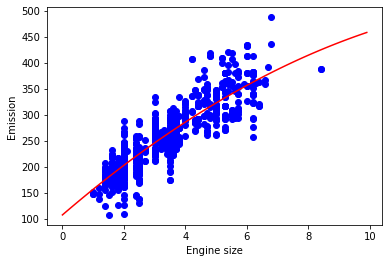

In [116]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy,'r-')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [117]:
#Evaluation
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of sqaures (MSE): %.2f" % np.mean((test_y_ - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y_, test_y))

Mean absolute error: 23.56
Residual sum of sqaures (MSE): 930.52
R2-score: 0.72


Now Try Polynomial Degree 3 

Coefficients:  [[ 0.         25.55352495  5.38311233 -0.57191688]]
Intercept:  [134.43317805]


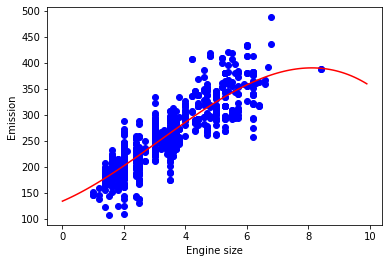

In [121]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

#The coefficients
print('Coefficients: ', clf3.coef_)
print('Intercept: ', clf3.intercept_)

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
XX=np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)

plt.plot(XX, yy, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)

#Evaluation
from sklearn.metrics import r2_score
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

In [122]:
#Evaluation 
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE) : %.2f" % np.mean((test_y3_ - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y) )


Mean absolute error: 23.54
Residual sum of squares (MSE) : 935.86
R2-score: 0.72
